In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import base64

In [8]:
#in 
df=pd.read_excel("Crisis_reports 2015-Present.xlsx")

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df['Disposition'] = df['Disposition'].str.upper().str.replace (" / ", "/", regex = True)
df['Exhibiting Behavior (group)'] = df['Exhibiting Behavior (group)'].str.upper().str.replace ("BEHAVIOR – ", "", regex = True)
df['Exhibiting Behavior (group)'] = df['Exhibiting Behavior (group)'].str.replace ("BEHAVIOR - ", "", regex = True)
df['Exhibiting Behavior (group)'] = df['Exhibiting Behavior (group)'].str.replace (" / ", "/", regex = True)
df['Exhibiting Behavior (group)'] = df['Exhibiting Behavior (group)'].str.replace ("\xa0", "", regex = True)
df['Offense/Incident Ind'] = df['Offense/Incident Ind'].str.upper()
df['Subject Gender'] = df['Subject Gender'].str.upper()
df['Subject Race'] = df['Subject Race'].str.upper()
df['Techniques Used'] = df['Techniques Used'].str.upper()
df['UoF Indicator'] = df['UoF Indicator'].str.replace ("N", "NO", regex = True)
df['UoF Indicator'] = df['UoF Indicator'].str.replace ("Y", "YES", regex = True)
df["Weapons Involved"] = df["Weapons Involved"].str.upper()
df['Weapons Involved'] = df['Weapons Involved'].str.replace("HANDGUN", "FIREARM", regex = True)
df['Weapons Involved'] = df['Weapons Involved'].str.replace ("RIFLE", "FIREARM", regex = True)
df['Weapons Involved'] = df['Weapons Involved'].str.replace ("SHOTGUN", "FIREARM", regex = True)
df['Weapons Involved'] = df['Weapons Involved'].str.replace ("OTHER FIREARM", "FIREARM", regex = True)

df = df.rename(columns = {'Exhibiting Behavior (group)': 'Behavior',
                          'Reported Date (Date)': 'Date',
                          'Offense/Incident Ind': 'OffenseIncident',
                          'Subject Age': 'Age',
                          'Subject Gender': 'Gender',
                          'Subject Race': 'Race',
                          'Techniques Used': 'Techniques',
                          'UoF Indicator': 'UoF',
                          'Weapons Involved': 'Weapons'})

df['Date'] = pd.to_datetime(df['Date'])

df['Behavior'] = df['Behavior'].str.replace ("BELLIGERENT/UNCOOPERATIVE", 'BELLIGERENT', regex = True)
df['Behavior'] = df['Behavior'].str.replace ('BELLIGERENT',"BELLIGERENT/UNCOOPERATIVE", regex = True)
df['Disposition'] = df['Disposition'].replace ("MCT (MOBILE CRISIS TEAM)", "MOBILE CRISIS TEAM" )
df['Disposition'] = df['Disposition'].replace ("RESOURCES DECLINED", "RESOURCES OFFERED/DECLINED" )
df['Disposition'] = df['Disposition'].replace ("DMHP REFERRAL", "DMHP/REFERRAL (DCR)" )
df['Disposition'] = df['Disposition'].replace ("CRISIS CLINIC (CRISIS CONNECTIONS)", "CRISIS CLINIC" )
df['Disposition'] = df['Disposition'].replace ("SHELTER", "SHELTER / SHELTER TRANSPORT" )
df['Disposition'] = df['Disposition'].replace ("SHELTER TRANSPORT", "SHELTER / SHELTER TRANSPORT" )
df['Disposition'] = df['Disposition'].replace ("CASE MANAGER/MH AGENCY NOTIFIED", "MENTAL HEALTH AGENCY OR CASE MANAGER NOTIFIED" )
df['Disposition'] = df['Disposition'].replace ("DRUG/ALCOHOL TREATMENT REFERRAL", "SOCIAL SERVICE/ALCOHOL AND DRUG/TREATMENT REFERRAL" )
df['Disposition'] = df['Disposition'].replace ("ARRESTED (REQUIRES ARREST REPORT)", "ARRESTED" )
df['Disposition'] = df['Disposition'].replace ("SUBJECT ARRESTED", "ARRESTED" )
df['Disposition'] = df['Disposition'].replace ("NO ACTION POSSIBLE/NECESSARY", "NO ACTION POSSIBLE/NECESSARY/UNABLE TO CONTACT" )
df['Disposition'] = df['Disposition'].replace ("UNABLE TO CONTACT", "NO ACTION POSSIBLE/NECESSARY/UNABLE TO CONTACT" )
df['Behavior'] = df['Behavior'].replace ("DISORDERLY", "DISORDERLY/DISRUPTIVE" )


In [11]:
df["Weapons"].unique()

array(['-', 'KNIFE/CUTTING/STABBING INSTRUMENT', 'NONE/NOT APPLICABLE',
       'PERSONAL WEAPONS (HANDS, FEET, ETC.)',
       'BLUNT OBJECT/STRIKING IMPLEMENT', 'FIREARM',
       'FIRE/INCENDIARY DEVICE', 'POISON', 'MACE/PEPPER SPRAY',
       'TASER/STUN GUN', 'EXPLOSIVES'], dtype=object)

In [12]:
df["Behavior"].unique()

array(['-', 'BELLIGERENT/UNCOOPERATIVE', 'DISORDERLY/DISRUPTIVE',
       'HALLUCINATIONS/DELUSIONS', 'NEGLECT/SELF CARE',
       'OUT OF TOUCH WITH REALITY', 'PARANOID', 'SUICIDE THREAT/ATTEMPT',
       'UNUSUALLY FRIGHTENED/SCARED', 'BIZARRE/UNUSUAL',
       'COOPERATIVE/ATTENTIVE', 'DISORGANIZED SPEECH/COMMUNICATION',
       'DISORIENTATION/CONFUSION', 'HOPELESS/DEPRESSED ', 'MANIC',
       'OTHER', 'PHYSICALLY THREATENING/AGGRESSIVE',
       'SUICIDE BY COP (SBC)', 'VERBALLY THREATENING/AGGRESSIVE'],
      dtype=object)

In [13]:
df["Techniques"].unique()

array(['-', 'VERBALIZATION', 'GURNEY', 'HANDCUFFING', 'NONE'],
      dtype=object)

In [14]:
df["Disposition"].unique()

array(['NO ACTION POSSIBLE/NECESSARY/UNABLE TO CONTACT',
       'RESOURCES OFFERED/DECLINED', 'GERIATRIC REGIONAL ASSESSMENT TEAM',
       'VOLUNTARY COMMITTAL', 'MOBILE CRISIS TEAM', 'CHRONIC COMPLAINT',
       '-', 'ARRESTED', 'SHELTER / SHELTER TRANSPORT',
       'EMERGENT DETENTION/ITA', 'CRISIS CLINIC',
       'MENTAL HEALTH AGENCY OR CASE MANAGER NOTIFIED',
       'SOCIAL SERVICE/ALCOHOL AND DRUG/TREATMENT REFERRAL',
       'DMHP/REFERRAL (DCR)', 'OTHER',
       'CSC/CDF (CRISIS SOLUTION CENTER/CRISIS DIVERSION FACILITY)',
       'COURTESY TRANSPORT', 'DETOX', 'SPRUCE STREET',
       'CRISIS RESPONSE BULLETIN REFERENCED',
       "CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM)"], dtype=object)

# **Breaking out the weapons involved in crisis data**

In [15]:
test_weap=df[["Date","Behavioral Crisis Num","CAD Event ID","Race","Gender","Age","UoF","Weapons"]]
test_weap["Dummy1"]=True #make dummy column with True values for unstack
test_weap=test_weap.groupby(["Behavioral Crisis Num","CAD Event ID","Race","Gender","Age","Date","UoF","Weapons"])["Dummy1"].aggregate('first').unstack() #makes data frame where multiple instances of combinations of Behavioral Crisis Num, CAD Event ID, Disposition
                                                                                                                                                #Race, Gender, Date, and UoF get collapsed into one instance. Additionally, all the weapon types involved get unstacked
                                                                                                                                                #into columns. If a specific weapon was involved in one of these collapsed instances, then it is marked as "True"
test_weap=test_weap.reset_index()
test_weap=test_weap.rename(
    columns={
        "-":"WEAPON: -",
        'KNIFE/CUTTING/STABBING INSTRUMENT':'WEAPON: KNIFE/CUTTING/STABBING INSTRUMENT',
        'NONE/NOT APPLICABLE': 'WEAPON: NONE/NOT APPLICABLE', 
        'PERSONAL WEAPONS (HANDS, FEET, ETC.)':'WEAPON: PERSONAL WEAPONS (HANDS, FEET, ETC.)',
        'BLUNT OBJECT/STRIKING IMPLEMENT': 'WEAPON: BLUNT OBJECT/STRIKING IMPLEMENT',
        'FIREARM':'WEAPON: FIREARM',
        'FIRE/INCENDIARY DEVICE':'WEAPON: FIRE/INCENDIARY DEVICE',
        'POISON':'WEAPON: POISON',
        'MACE/PEPPER SPRAY': "WEAPON: MACE/PEPPER SPRAY",
        'TASER/STUN GUN':"WEAPON: TASER/STUN GUN",
        'EXPLOSIVES':'WEAPON: EXPLOSIVES'
    }

)
test_weap

<ipython-input-15-94cec90a9836>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_weap["Dummy1"]=True #make dummy column with True values for unstack


Weapons,Behavioral Crisis Num,CAD Event ID,Race,Gender,Age,Date,UoF,WEAPON: -,WEAPON: BLUNT OBJECT/STRIKING IMPLEMENT,WEAPON: EXPLOSIVES,WEAPON: FIRE/INCENDIARY DEVICE,WEAPON: FIREARM,WEAPON: KNIFE/CUTTING/STABBING INSTRUMENT,WEAPON: MACE/PEPPER SPRAY,WEAPON: NONE/NOT APPLICABLE,"WEAPON: PERSONAL WEAPONS (HANDS, FEET, ETC.)",WEAPON: POISON,WEAPON: TASER/STUN GUN
0,43469,2015000159320,-,-,-1,2015-05-15,NO,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43479,2015000159806,-,-,-1,2015-05-15,NO,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43653,2015000159907,-,-,-1,2015-05-15,NO,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43662,2015000160039,-,-,-1,2015-05-15,NO,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43719,2015000160408,-,-,-1,2015-05-16,NO,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61406,25411951008,2021000141094,WHITE,FEMALE,35,2021-06-07,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
61407,25411999185,2021000141211,UNKNOWN,FEMALE,59,2021-06-07,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
61408,25412466851,2021000141111,WHITE,MALE,29,2021-06-07,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
61409,25412573164,2021000141255,WHITE,MALE,66,2021-06-08,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN


In [16]:
test_weap["Behavioral Crisis Num"].value_counts().sort_values(ascending=False)

12784637955    1
8613840921     1
51225          1
15685787652    1
147464         1
              ..
8613810166     1
540664         1
178863         1
232295         1
229766         1
Name: Behavioral Crisis Num, Length: 61411, dtype: int64

## Example of crisis in which multiple weapons are involved

### From original dataframe

In [17]:
df[df["CAD Event ID"]==2020000275830]

,Behavioral Crisis Num,CAD Event ID,Disposition,Behavior,OffenseIncident,Age,Gender,Race,Techniques,UoF,Weapons,Date
31997,15683572604,2020000275830,ARRESTED,BELLIGERENT/UNCOOPERATIVE,INCIDENT,41,MALE,WHITE,GURNEY,YES,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-09-24
31998,15683572604,2020000275830,ARRESTED,BELLIGERENT/UNCOOPERATIVE,OFFENSE,41,MALE,WHITE,GURNEY,YES,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-09-24
31999,15683572604,2020000275830,ARRESTED,BELLIGERENT/UNCOOPERATIVE,INCIDENT,41,MALE,WHITE,GURNEY,YES,TASER/STUN GUN,2020-09-24
32000,15683572604,2020000275830,ARRESTED,BELLIGERENT/UNCOOPERATIVE,OFFENSE,41,MALE,WHITE,GURNEY,YES,TASER/STUN GUN,2020-09-24
32001,15683572604,2020000275830,ARRESTED,BELLIGERENT/UNCOOPERATIVE,INCIDENT,41,MALE,WHITE,HANDCUFFING,YES,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...
83843,15683572604,2020000275830,ARRESTED,PHYSICALLY THREATENING/AGGRESSIVE,OFFENSE,41,MALE,WHITE,HANDCUFFING,YES,TASER/STUN GUN,2020-09-24
83844,15683572604,2020000275830,ARRESTED,PHYSICALLY THREATENING/AGGRESSIVE,INCIDENT,41,MALE,WHITE,VERBALIZATION,YES,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-09-24
83845,15683572604,2020000275830,ARRESTED,PHYSICALLY THREATENING/AGGRESSIVE,OFFENSE,41,MALE,WHITE,VERBALIZATION,YES,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-09-24
83846,15683572604,2020000275830,ARRESTED,PHYSICALLY THREATENING/AGGRESSIVE,INCIDENT,41,MALE,WHITE,VERBALIZATION,YES,TASER/STUN GUN,2020-09-24


### From reshaped dataframe

In [18]:
test_weap[test_weap["CAD Event ID"]==2020000275830]

Weapons,Behavioral Crisis Num,CAD Event ID,Race,Gender,Age,Date,UoF,WEAPON: -,WEAPON: BLUNT OBJECT/STRIKING IMPLEMENT,WEAPON: EXPLOSIVES,WEAPON: FIRE/INCENDIARY DEVICE,WEAPON: FIREARM,WEAPON: KNIFE/CUTTING/STABBING INSTRUMENT,WEAPON: MACE/PEPPER SPRAY,WEAPON: NONE/NOT APPLICABLE,"WEAPON: PERSONAL WEAPONS (HANDS, FEET, ETC.)",WEAPON: POISON,WEAPON: TASER/STUN GUN
54034,15683572604,2020000275830,WHITE,MALE,41,2020-09-24,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True


# **Breaking Out the Behavior involved in the Crisis Data**

In [19]:
test_beh=df[["Date","Behavioral Crisis Num","CAD Event ID","Race","Gender","Age","UoF","Behavior"]]
test_beh["Dummy1"]=True #make dummy column with True values for unstack
test_beh=test_beh.groupby(["Behavioral Crisis Num","CAD Event ID","Race","Gender","Age","Date","UoF","Behavior"])["Dummy1"].aggregate('first').unstack() #makes data frame where multiple instances of combinations of Behavioral Crisis Num, CAD Event ID, Disposition
                                                                                                                                                #Race, Gender, Date, and UoF get collapsed into one instance. Additionally, all the weapon types involved get unstacked
                                                                                                                                                #into columns. If a specific weapon was involved in one of these collapsed instances, then it is marked as "True"
test_beh=test_beh.reset_index()
test_beh=test_beh.rename(
    columns={
        '-': 'BEH: -',
        'BELLIGERENT/UNCOOPERATIVE': "BEH: BELLIGERENT/UNCOOPERATIVE",
        'DISORDERLY/DISRUPTIVE': "BEH: DISORDERLY/DISRUPTIVE",
        'HALLUCINATIONS/DELUSIONS': "BEH: HALLUCINATIONS/DELUSIONS", 
        'NEGLECT/SELF CARE': "BEH: NEGLECT/SELF CARE",
        'OUT OF TOUCH WITH REALITY': "BEH: OUT OF TOUCH WITH REALITY", 
        'PARANOID': "BEH: PARANOID", 
        'SUICIDE THREAT/ATTEMPT': "BEH: SUICIDE THREAT/ATTEMPT",
        'UNUSUALLY FRIGHTENED/SCARED':"BEH: UNUSUALLY FRIGHTENED/SCARED", 
        'BIZARRE/UNUSUAL': "BEH: BIZARRE/UNUSUAL",
        'COOPERATIVE/ATTENTIVE': "BEH: COOPERATIVE/ATTENTIVE", 
        'DISORGANIZED SPEECH/COMMUNICATION': "BEH: DISORGANIZED SPEECH/COMMUNICATION",
        'DISORIENTATION/CONFUSION':"BEH: DISORIENTATION/CONFUSION", 
        'HOPELESS/DEPRESSED ':"BEH: HOPELESS/DEPRESSED ", 
        'MANIC':"BEH: MANIC",
        'OTHER':"BEH: OTHER", 
        'PHYSICALLY THREATENING/AGGRESSIVE':"BEH: PHYSICALLY THREATENING/AGGRESSIVE",
        'SUICIDE BY COP (SBC)':"BEH: SUICIDE BY COP (SBC)", 
        'VERBALLY THREATENING/AGGRESSIVE': "BEH: VERBALLY THREATENING/AGGRESSIVE"
    }

)


test_beh

<ipython-input-19-e476fb2dcabd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_beh["Dummy1"]=True #make dummy column with True values for unstack


Behavior,Behavioral Crisis Num,CAD Event ID,Race,Gender,Age,Date,UoF,BEH: -,BEH: BELLIGERENT/UNCOOPERATIVE,BEH: BIZARRE/UNUSUAL,BEH: COOPERATIVE/ATTENTIVE,BEH: DISORDERLY/DISRUPTIVE,BEH: DISORGANIZED SPEECH/COMMUNICATION,BEH: DISORIENTATION/CONFUSION,BEH: HALLUCINATIONS/DELUSIONS,BEH: HOPELESS/DEPRESSED,BEH: MANIC,BEH: NEGLECT/SELF CARE,BEH: OTHER,BEH: OUT OF TOUCH WITH REALITY,BEH: PARANOID,BEH: PHYSICALLY THREATENING/AGGRESSIVE,BEH: SUICIDE BY COP (SBC),BEH: SUICIDE THREAT/ATTEMPT,BEH: UNUSUALLY FRIGHTENED/SCARED,BEH: VERBALLY THREATENING/AGGRESSIVE
0,43469,2015000159320,-,-,-1,2015-05-15,NO,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43479,2015000159806,-,-,-1,2015-05-15,NO,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43653,2015000159907,-,-,-1,2015-05-15,NO,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43662,2015000160039,-,-,-1,2015-05-15,NO,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43719,2015000160408,-,-,-1,2015-05-16,NO,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61406,25411951008,2021000141094,WHITE,FEMALE,35,2021-06-07,NO,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN
61407,25411999185,2021000141211,UNKNOWN,FEMALE,59,2021-06-07,NO,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61408,25412466851,2021000141111,WHITE,MALE,29,2021-06-07,NO,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61409,25412573164,2021000141255,WHITE,MALE,66,2021-06-08,NO,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
test_beh["Behavioral Crisis Num"].value_counts().sort_values(ascending=False)

12784637955    1
8613840921     1
51225          1
15685787652    1
147464         1
              ..
8613810166     1
540664         1
178863         1
232295         1
229766         1
Name: Behavioral Crisis Num, Length: 61411, dtype: int64

## Example of crisis in which multiple behaviors are involved

### From original dataframe

In [21]:
df[df["CAD Event ID"]==2020000275830]

,Behavioral Crisis Num,CAD Event ID,Disposition,Behavior,OffenseIncident,Age,Gender,Race,Techniques,UoF,Weapons,Date
31997,15683572604,2020000275830,ARRESTED,BELLIGERENT/UNCOOPERATIVE,INCIDENT,41,MALE,WHITE,GURNEY,YES,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-09-24
31998,15683572604,2020000275830,ARRESTED,BELLIGERENT/UNCOOPERATIVE,OFFENSE,41,MALE,WHITE,GURNEY,YES,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-09-24
31999,15683572604,2020000275830,ARRESTED,BELLIGERENT/UNCOOPERATIVE,INCIDENT,41,MALE,WHITE,GURNEY,YES,TASER/STUN GUN,2020-09-24
32000,15683572604,2020000275830,ARRESTED,BELLIGERENT/UNCOOPERATIVE,OFFENSE,41,MALE,WHITE,GURNEY,YES,TASER/STUN GUN,2020-09-24
32001,15683572604,2020000275830,ARRESTED,BELLIGERENT/UNCOOPERATIVE,INCIDENT,41,MALE,WHITE,HANDCUFFING,YES,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...
83843,15683572604,2020000275830,ARRESTED,PHYSICALLY THREATENING/AGGRESSIVE,OFFENSE,41,MALE,WHITE,HANDCUFFING,YES,TASER/STUN GUN,2020-09-24
83844,15683572604,2020000275830,ARRESTED,PHYSICALLY THREATENING/AGGRESSIVE,INCIDENT,41,MALE,WHITE,VERBALIZATION,YES,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-09-24
83845,15683572604,2020000275830,ARRESTED,PHYSICALLY THREATENING/AGGRESSIVE,OFFENSE,41,MALE,WHITE,VERBALIZATION,YES,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-09-24
83846,15683572604,2020000275830,ARRESTED,PHYSICALLY THREATENING/AGGRESSIVE,INCIDENT,41,MALE,WHITE,VERBALIZATION,YES,TASER/STUN GUN,2020-09-24


### From reshaped dataframe

In [22]:
test_beh[test_beh["CAD Event ID"]==2020000275830]

Behavior,Behavioral Crisis Num,CAD Event ID,Race,Gender,Age,Date,UoF,BEH: -,BEH: BELLIGERENT/UNCOOPERATIVE,BEH: BIZARRE/UNUSUAL,BEH: COOPERATIVE/ATTENTIVE,BEH: DISORDERLY/DISRUPTIVE,BEH: DISORGANIZED SPEECH/COMMUNICATION,BEH: DISORIENTATION/CONFUSION,BEH: HALLUCINATIONS/DELUSIONS,BEH: HOPELESS/DEPRESSED,BEH: MANIC,BEH: NEGLECT/SELF CARE,BEH: OTHER,BEH: OUT OF TOUCH WITH REALITY,BEH: PARANOID,BEH: PHYSICALLY THREATENING/AGGRESSIVE,BEH: SUICIDE BY COP (SBC),BEH: SUICIDE THREAT/ATTEMPT,BEH: UNUSUALLY FRIGHTENED/SCARED,BEH: VERBALLY THREATENING/AGGRESSIVE
54034,15683572604,2020000275830,WHITE,MALE,41,2020-09-24,YES,NaN,True,True,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,True,NaN,True,NaN,NaN,NaN,NaN


# **Break out the Techniques Used**

In [23]:
test_tech=df[["Date","Behavioral Crisis Num","CAD Event ID","Race","Gender","Age","UoF","Techniques"]]
test_tech["Dummy1"]=True #make dummy column with True values for unstack
test_tech=test_tech.groupby(["Behavioral Crisis Num","CAD Event ID","Race","Gender","Age","Date","UoF","Techniques"])["Dummy1"].aggregate('first').unstack() #makes data frame where multiple instances of combinations of Behavioral Crisis Num, CAD Event ID, Disposition
                                                                                                                                                #Race, Gender, Date, and UoF get collapsed into one instance. Additionally, all the weapon types involved get unstacked
                                                                                                                                                #into columns. If a specific weapon was involved in one of these collapsed instances, then it is marked as "True"
test_tech=test_tech.reset_index()
test_tech=test_tech.rename(
    columns={
        '-':'TECH: -',
        'VERBALIZATION': "TECH: VERBALIZATION",
        'GURNEY':"TECH: GURNEY",
        'HANDCUFFING': "TECH: HANDCUFFING", 
        'NONE': "TECH: NONE"
    }

)


test_tech=test_tech.rename(index={"Techniques": "Key"})
test_tech

<ipython-input-23-dbd422740446>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_tech["Dummy1"]=True #make dummy column with True values for unstack


Techniques,Behavioral Crisis Num,CAD Event ID,Race,Gender,Age,Date,UoF,TECH: -,TECH: GURNEY,TECH: HANDCUFFING,TECH: NONE,TECH: VERBALIZATION
0,43469,2015000159320,-,-,-1,2015-05-15,NO,True,NaN,NaN,NaN,NaN
1,43479,2015000159806,-,-,-1,2015-05-15,NO,True,NaN,NaN,NaN,NaN
2,43653,2015000159907,-,-,-1,2015-05-15,NO,True,NaN,NaN,NaN,NaN
3,43662,2015000160039,-,-,-1,2015-05-15,NO,True,NaN,NaN,NaN,NaN
4,43719,2015000160408,-,-,-1,2015-05-16,NO,True,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
61406,25411951008,2021000141094,WHITE,FEMALE,35,2021-06-07,NO,NaN,NaN,NaN,NaN,True
61407,25411999185,2021000141211,UNKNOWN,FEMALE,59,2021-06-07,NO,NaN,NaN,NaN,NaN,True
61408,25412466851,2021000141111,WHITE,MALE,29,2021-06-07,NO,NaN,NaN,NaN,NaN,True
61409,25412573164,2021000141255,WHITE,MALE,66,2021-06-08,NO,NaN,NaN,NaN,True,NaN


In [24]:
test_tech["Behavioral Crisis Num"].value_counts().sort_values(ascending=False)

12784637955    1
8613840921     1
51225          1
15685787652    1
147464         1
              ..
8613810166     1
540664         1
178863         1
232295         1
229766         1
Name: Behavioral Crisis Num, Length: 61411, dtype: int64

## Example of a crisis in which multiple techniques are used on one single subject

### From original dataframe

In [25]:
df[df["CAD Event ID"]==2020000275830]

,Behavioral Crisis Num,CAD Event ID,Disposition,Behavior,OffenseIncident,Age,Gender,Race,Techniques,UoF,Weapons,Date
31997,15683572604,2020000275830,ARRESTED,BELLIGERENT/UNCOOPERATIVE,INCIDENT,41,MALE,WHITE,GURNEY,YES,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-09-24
31998,15683572604,2020000275830,ARRESTED,BELLIGERENT/UNCOOPERATIVE,OFFENSE,41,MALE,WHITE,GURNEY,YES,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-09-24
31999,15683572604,2020000275830,ARRESTED,BELLIGERENT/UNCOOPERATIVE,INCIDENT,41,MALE,WHITE,GURNEY,YES,TASER/STUN GUN,2020-09-24
32000,15683572604,2020000275830,ARRESTED,BELLIGERENT/UNCOOPERATIVE,OFFENSE,41,MALE,WHITE,GURNEY,YES,TASER/STUN GUN,2020-09-24
32001,15683572604,2020000275830,ARRESTED,BELLIGERENT/UNCOOPERATIVE,INCIDENT,41,MALE,WHITE,HANDCUFFING,YES,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...
83843,15683572604,2020000275830,ARRESTED,PHYSICALLY THREATENING/AGGRESSIVE,OFFENSE,41,MALE,WHITE,HANDCUFFING,YES,TASER/STUN GUN,2020-09-24
83844,15683572604,2020000275830,ARRESTED,PHYSICALLY THREATENING/AGGRESSIVE,INCIDENT,41,MALE,WHITE,VERBALIZATION,YES,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-09-24
83845,15683572604,2020000275830,ARRESTED,PHYSICALLY THREATENING/AGGRESSIVE,OFFENSE,41,MALE,WHITE,VERBALIZATION,YES,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-09-24
83846,15683572604,2020000275830,ARRESTED,PHYSICALLY THREATENING/AGGRESSIVE,INCIDENT,41,MALE,WHITE,VERBALIZATION,YES,TASER/STUN GUN,2020-09-24


### From reshaped dataframe

In [26]:
test_tech[test_tech["CAD Event ID"]==2020000275830]

Techniques,Behavioral Crisis Num,CAD Event ID,Race,Gender,Age,Date,UoF,TECH: -,TECH: GURNEY,TECH: HANDCUFFING,TECH: NONE,TECH: VERBALIZATION
54034,15683572604,2020000275830,WHITE,MALE,41,2020-09-24,YES,NaN,True,True,NaN,True


# **Break Out the Dispositions Involved**

In [27]:
test_disp=df[["Date","Behavioral Crisis Num","CAD Event ID","Race","Gender","Age","UoF","Disposition"]]
test_disp["Dummy1"]=True #make dummy column with True values for unstack
test_disp=test_disp.groupby(["Behavioral Crisis Num","CAD Event ID","Race","Gender","Age","Date","UoF","Disposition"])["Dummy1"].aggregate('first').unstack() #makes data frame where multiple instances of combinations of Behavioral Crisis Num, CAD Event ID, Disposition
                                                                                                                                                #Race, Gender, Date, and UoF get collapsed into one instance. Additionally, all the weapon types involved get unstacked
                                                                                                                                                #into columns. If a specific weapon was involved in one of these collapsed instances, then it is marked as "True"
test_disp=test_disp.reset_index()
test_disp=test_disp.rename(
    columns={
        'NO ACTION POSSIBLE/NECESSARY/UNABLE TO CONTACT':"DISP: NO ACTION POSSIBLE/NECESSARY/UNABLE TO CONTACT",
        'RESOURCES OFFERED/DECLINED':"DISP: RESOURCES OFFERED/DECLINED",
        'GERIATRIC REGIONAL ASSESSMENT TEAM':"DISP: GERIATRIC REGIONAL ASSESSMENT TEAM",
        'VOLUNTARY COMMITTAL':"DISP: VOLUNTARY COMMITTAL", 
        'MOBILE CRISIS TEAM':"DISP: MOBILE CRISIS TEAM", 
        'CHRONIC COMPLAINT':"DISP: CHRONIC COMPLAINT",
        '-':"DISP: -", 
        'ARRESTED':"DISP: ARRESTED", 
        'SHELTER / SHELTER TRANSPORT':"DISP: SHELTER / SHELTER TRANSPORT",
        'EMERGENT DETENTION/ITA':"DISP: EMERGENT DETENTION/ITA", 
        'CRISIS CLINIC':"DISP: CRISIS CLINIC",
        'MENTAL HEALTH AGENCY OR CASE MANAGER NOTIFIED':"DISP: MENTAL HEALTH AGENCY OR CASE MANAGER NOTIFIED",
        'SOCIAL SERVICE/ALCOHOL AND DRUG/TREATMENT REFERRAL':"DISP: SOCIAL SERVICE/ALCOHOL AND DRUG/TREATMENT REFERRAL",
        'DMHP/REFERRAL (DCR)':"DISP: DMHP/REFERRAL (DCR)", 
        'OTHER':"DISP: OTHER",
        'CSC/CDF (CRISIS SOLUTION CENTER/CRISIS DIVERSION FACILITY)':"DISP: CSC/CDF (CRISIS SOLUTION CENTER/CRISIS DIVERSION FACILITY)",
        'COURTESY TRANSPORT':"DISP: COURTESY TRANSPORT", 
        'DETOX':"DISP: DETOX", 
        'SPRUCE STREET':"DISP: SPRUCE STREET",
        'CRISIS RESPONSE BULLETIN REFERENCED':"DISP: CRISIS RESPONSE BULLETIN REFERENCED",
        "CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM)":"DISP: CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM)"
    }

)


test_disp




<ipython-input-27-3b65ce0da0e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_disp["Dummy1"]=True #make dummy column with True values for unstack


Disposition,Behavioral Crisis Num,CAD Event ID,Race,Gender,Age,Date,UoF,DISP: -,DISP: ARRESTED,DISP: CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM),DISP: CHRONIC COMPLAINT,DISP: COURTESY TRANSPORT,DISP: CRISIS CLINIC,DISP: CRISIS RESPONSE BULLETIN REFERENCED,DISP: CSC/CDF (CRISIS SOLUTION CENTER/CRISIS DIVERSION FACILITY),DISP: DETOX,DISP: DMHP/REFERRAL (DCR),DISP: EMERGENT DETENTION/ITA,DISP: GERIATRIC REGIONAL ASSESSMENT TEAM,DISP: MENTAL HEALTH AGENCY OR CASE MANAGER NOTIFIED,DISP: MOBILE CRISIS TEAM,DISP: NO ACTION POSSIBLE/NECESSARY/UNABLE TO CONTACT,DISP: OTHER,DISP: RESOURCES OFFERED/DECLINED,DISP: SHELTER / SHELTER TRANSPORT,DISP: SOCIAL SERVICE/ALCOHOL AND DRUG/TREATMENT REFERRAL,DISP: SPRUCE STREET,DISP: VOLUNTARY COMMITTAL
0,43469,2015000159320,-,-,-1,2015-05-15,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43479,2015000159806,-,-,-1,2015-05-15,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43653,2015000159907,-,-,-1,2015-05-15,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
3,43662,2015000160039,-,-,-1,2015-05-15,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
4,43719,2015000160408,-,-,-1,2015-05-16,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61406,25411951008,2021000141094,WHITE,FEMALE,35,2021-06-07,NO,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61407,25411999185,2021000141211,UNKNOWN,FEMALE,59,2021-06-07,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
61408,25412466851,2021000141111,WHITE,MALE,29,2021-06-07,NO,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61409,25412573164,2021000141255,WHITE,MALE,66,2021-06-08,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
test_disp["Behavioral Crisis Num"].value_counts().sort_values(ascending=False)

12784637955    1
8613840921     1
51225          1
15685787652    1
147464         1
              ..
8613810166     1
540664         1
178863         1
232295         1
229766         1
Name: Behavioral Crisis Num, Length: 61411, dtype: int64

## Example of crisis with multiple dispositions

### From original dataframe

In [29]:
df[df["CAD Event ID"]==2020000183257]

,Behavioral Crisis Num,CAD Event ID,Disposition,Behavior,OffenseIncident,Age,Gender,Race,Techniques,UoF,Weapons,Date
31271,13376115746,2020000183257,CHRONIC COMPLAINT,BELLIGERENT/UNCOOPERATIVE,INCIDENT,35,MALE,WHITE,GURNEY,NO,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-06-07
31272,13376115746,2020000183257,CHRONIC COMPLAINT,BELLIGERENT/UNCOOPERATIVE,OFFENSE,35,MALE,WHITE,GURNEY,NO,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-06-07
31273,13376115746,2020000183257,CHRONIC COMPLAINT,BELLIGERENT/UNCOOPERATIVE,INCIDENT,35,MALE,WHITE,VERBALIZATION,NO,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-06-07
31274,13376115746,2020000183257,CHRONIC COMPLAINT,BELLIGERENT/UNCOOPERATIVE,OFFENSE,35,MALE,WHITE,VERBALIZATION,NO,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-06-07
31275,13376115746,2020000183257,EMERGENT DETENTION/ITA,BELLIGERENT/UNCOOPERATIVE,INCIDENT,35,MALE,WHITE,GURNEY,NO,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...
97937,13376115746,2020000183257,CHRONIC COMPLAINT,UNUSUALLY FRIGHTENED/SCARED,OFFENSE,35,MALE,WHITE,VERBALIZATION,NO,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-06-07
97938,13376115746,2020000183257,EMERGENT DETENTION/ITA,UNUSUALLY FRIGHTENED/SCARED,INCIDENT,35,MALE,WHITE,GURNEY,NO,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-06-07
97939,13376115746,2020000183257,EMERGENT DETENTION/ITA,UNUSUALLY FRIGHTENED/SCARED,OFFENSE,35,MALE,WHITE,GURNEY,NO,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-06-07
97940,13376115746,2020000183257,EMERGENT DETENTION/ITA,UNUSUALLY FRIGHTENED/SCARED,INCIDENT,35,MALE,WHITE,VERBALIZATION,NO,"PERSONAL WEAPONS (HANDS, FEET, ETC.)",2020-06-07


### From reshaped dataframe

In [30]:
test_disp[test_disp["CAD Event ID"]==2020000183257]

Disposition,Behavioral Crisis Num,CAD Event ID,Race,Gender,Age,Date,UoF,DISP: -,DISP: ARRESTED,DISP: CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM),DISP: CHRONIC COMPLAINT,DISP: COURTESY TRANSPORT,DISP: CRISIS CLINIC,DISP: CRISIS RESPONSE BULLETIN REFERENCED,DISP: CSC/CDF (CRISIS SOLUTION CENTER/CRISIS DIVERSION FACILITY),DISP: DETOX,DISP: DMHP/REFERRAL (DCR),DISP: EMERGENT DETENTION/ITA,DISP: GERIATRIC REGIONAL ASSESSMENT TEAM,DISP: MENTAL HEALTH AGENCY OR CASE MANAGER NOTIFIED,DISP: MOBILE CRISIS TEAM,DISP: NO ACTION POSSIBLE/NECESSARY/UNABLE TO CONTACT,DISP: OTHER,DISP: RESOURCES OFFERED/DECLINED,DISP: SHELTER / SHELTER TRANSPORT,DISP: SOCIAL SERVICE/ALCOHOL AND DRUG/TREATMENT REFERRAL,DISP: SPRUCE STREET,DISP: VOLUNTARY COMMITTAL
51466,13376115746,2020000183257,WHITE,MALE,35,2020-06-07,NO,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Merging Data**

In [31]:
# test=calls.merge(crime, on="GO Num", how="left")
# test.head(5)

In [32]:
crisis_final=test_weap.merge(test_beh, on=["Date","Behavioral Crisis Num","CAD Event ID","Race","Gender","Age","UoF"], how="left")
crisis_final=crisis_final.merge(test_tech,on=["Date","Behavioral Crisis Num","CAD Event ID","Race","Gender","Age","UoF"], how="left")
crisis_final=crisis_final.merge(test_disp,on=["Date","Behavioral Crisis Num","CAD Event ID","Race","Gender","Age","UoF"], how="left")
crisis_final

,Behavioral Crisis Num,CAD Event ID,Race,Gender,Age,Date,UoF,WEAPON: -,WEAPON: BLUNT OBJECT/STRIKING IMPLEMENT,WEAPON: EXPLOSIVES,WEAPON: FIRE/INCENDIARY DEVICE,WEAPON: FIREARM,WEAPON: KNIFE/CUTTING/STABBING INSTRUMENT,WEAPON: MACE/PEPPER SPRAY,WEAPON: NONE/NOT APPLICABLE,"WEAPON: PERSONAL WEAPONS (HANDS, FEET, ETC.)",WEAPON: POISON,WEAPON: TASER/STUN GUN,BEH: -,BEH: BELLIGERENT/UNCOOPERATIVE,BEH: BIZARRE/UNUSUAL,BEH: COOPERATIVE/ATTENTIVE,BEH: DISORDERLY/DISRUPTIVE,BEH: DISORGANIZED SPEECH/COMMUNICATION,BEH: DISORIENTATION/CONFUSION,BEH: HALLUCINATIONS/DELUSIONS,BEH: HOPELESS/DEPRESSED,BEH: MANIC,BEH: NEGLECT/SELF CARE,BEH: OTHER,BEH: OUT OF TOUCH WITH REALITY,BEH: PARANOID,BEH: PHYSICALLY THREATENING/AGGRESSIVE,BEH: SUICIDE BY COP (SBC),BEH: SUICIDE THREAT/ATTEMPT,BEH: UNUSUALLY FRIGHTENED/SCARED,BEH: VERBALLY THREATENING/AGGRESSIVE,TECH: -,TECH: GURNEY,TECH: HANDCUFFING,TECH: NONE,TECH: VERBALIZATION,DISP: -,DISP: ARRESTED,DISP: CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM),DISP: CHRONIC COMPLAINT,DISP: COURTESY TRANSPORT,DISP: CRISIS CLINIC,DISP: CRISIS RESPONSE BULLETIN REFERENCED,DISP: CSC/CDF (CRISIS SOLUTION CENTER/CRISIS DIVERSION FACILITY),DISP: DETOX,DISP: DMHP/REFERRAL (DCR),DISP: EMERGENT DETENTION/ITA,DISP: GERIATRIC REGIONAL ASSESSMENT TEAM,DISP: MENTAL HEALTH AGENCY OR CASE MANAGER NOTIFIED,DISP: MOBILE CRISIS TEAM,DISP: NO ACTION POSSIBLE/NECESSARY/UNABLE TO CONTACT,DISP: OTHER,DISP: RESOURCES OFFERED/DECLINED,DISP: SHELTER / SHELTER TRANSPORT,DISP: SOCIAL SERVICE/ALCOHOL AND DRUG/TREATMENT REFERRAL,DISP: SPRUCE STREET,DISP: VOLUNTARY COMMITTAL
0,43469,2015000159320,-,-,-1,2015-05-15,NO,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43479,2015000159806,-,-,-1,2015-05-15,NO,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43653,2015000159907,-,-,-1,2015-05-15,NO,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
3,43662,2015000160039,-,-,-1,2015-05-15,NO,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
4,43719,2015000160408,-,-,-1,2015-05-16,NO,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61406,25411951008,2021000141094,WHITE,FEMALE,35,2021-06-07,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61407,25411999185,2021000141211,UNKNOWN,FEMALE,59,2021-06-07,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
61408,25412466851,2021000141111,WHITE,MALE,29,2021-06-07,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,

# Create a Month and Year column for the Crisis Final

In [33]:
crisis_final['YEAR']= crisis_final['Date'].dt.year
crisis_final['M'] = crisis_final['Date'].dt.month

In [34]:
plot_hour = crisis_final[['Date', 'YEAR','M']].groupby(['YEAR', 'M']).size()
plot_hour

YEAR  M
2015  5    403
      6    865
      7    848
      8    846
      9    794
          ... 
2021  2    843
      3    881
      4    929
      5    942
      6    223
Length: 74, dtype: int64

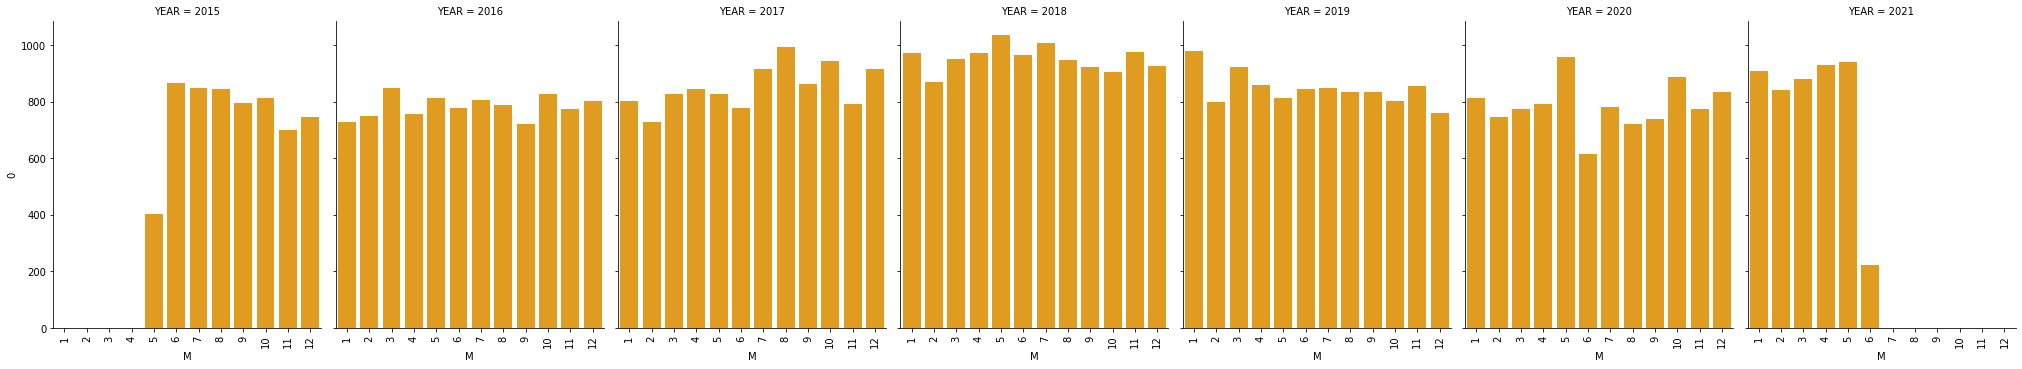

In [35]:
x = plot_hour.to_frame().reset_index()
g = sns.catplot(
    x="M",
    y=0,
    col="YEAR",
    data=x,
    kind="bar",
    height=5,
    aspect=0.8,
    color="orange",
    margin_titles=True,
)
g.set_xticklabels(rotation=90)

In [36]:
crisis_final["Behavioral Crisis Num"].value_counts().sort_values(ascending=False)

12784637955    1
8613840921     1
51225          1
15685787652    1
147464         1
              ..
8613810166     1
540664         1
178863         1
232295         1
229766         1
Name: Behavioral Crisis Num, Length: 61411, dtype: int64

Text(0, 0.5, 'Percentage')

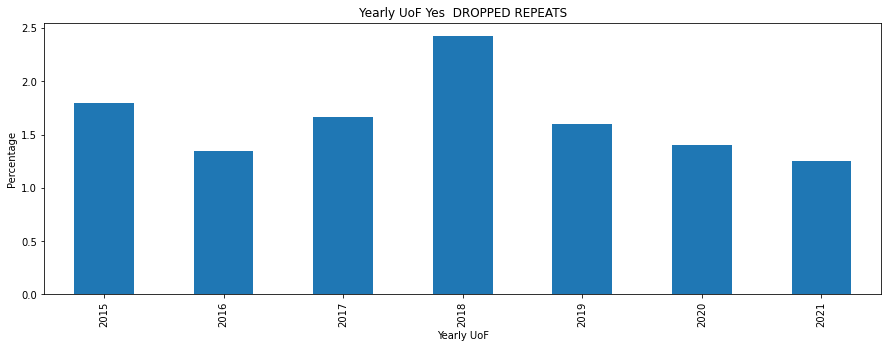

In [37]:
yearly_totals_ = crisis_final.groupby(['YEAR']).size()
year_yes = crisis_final[crisis_final['UoF'] == 'YES']#.size( )
year_yes1 = year_yes.groupby(['YEAR']).size()
yearly_total = crisis_final.groupby(['YEAR']).size()
yearly_yes = (year_yes1/yearly_total) * 100
yearly_yes.plot(kind = 'bar', figsize=(15, 5))
plt.title("Yearly UoF Yes  DROPPED REPEATS")
plt.xlabel("Yearly UoF")
plt.ylabel("Percentage")

In [38]:
yearly_yes #the percentages 

YEAR
2015    1.795511
2016    1.341424
2017    1.661130
2018    2.427948
2019    1.595116
2020    1.398898
2021    1.248149
dtype: float64